## **Project Name**:
Machine Learning July Major Project

## **Project Description:**
The dataset is of 0-9 digits converted from image to input features, every row represents a specific digit image along with labels for every row. You can view the image using Matplotlib if you wish to. Design a project from the MNIST dataset to identify digit classification using any of the classification algorithms.

## **Data Set Drive Link:**
https://drive.google.com/drive/folders/1ibzHff2uS4hUbTHI1fxihaDscA028aWm?usp=sharing

### **Importing required libraries**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.precision',5)
pd.set_option('display.max_colwidth',100)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
# get_ipython().magic(u'matplotlib inline')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### **Loading data in pandas DataFrame**

In [3]:
df = pd.read_csv('/content/digit_svm.csv')

### **Exploring Data**

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.00000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.00000,42000.00000,42000.00000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,...,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.00000,42000.0,42000.0,42000.0,42000.0
mean,4.45664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.01119,0.00514,0.00021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00038,0.00131,0.01055,0.02726,0.05090,0.06640,0.12957,...,3.77252,2.74890,1.79645,1.08990,0.56319,0.23957,0.09352,0.02483,0.00086,0.00140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00614,0.03583,0.08236,0.11490,0.17871,0.30145,0.41364,0.51367,0.55883,0.67786,0.60281,0.48924,0.34021,0.21929,0.11710,0.05902,0.02019,0.01724,0.00286,0.0,0.0,0.0,0.0
std,2.88773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.62693,1.05397,0.04392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07807,0.23263,1.13166,2.31040,3.12185,3.25913,4.99289,...,26.95783,22.87925,18.59511,14.43444,10.51782,6.46931,3.97631,1.84602,0.13956,0.28789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94980,2.35086,3.93428,4.54358,5.85677,7.21974,8.92829,10.00407,10.12960,11.25493,10.69603,9.48007,7.95025,6.31289,4.63382,3.27449,1.75987,1.89450,0.41426,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
25%,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
50%,4.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
75%,7.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [12]:
def pixel_mat(row):
    # we're working with df so we want to drop the label column
    vec = df.drop('label', axis=1).iloc[row].values
    # numpy provides the reshape() function to reorganize arrays into specified shapes
    pixel_mat = vec.reshape(28,28)
    return pixel_mat

In [13]:
x = np.random.randint(0,42000)
X = pixel_mat(x)
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123,
        254, 101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
X = X[~np.all(X == 0, axis=1)]
X = X[:,~np.all(X == 0, axis=0)]
print(X)

[[  0   0   0   0   0 123 254 101   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  81 254 253 239  85  85 104 155  85  85  50   0   0   0
    0   0]
 [  0   0   0   6 207 251 197 243 253 253 254 253 253 253 245 234 233 135
   57  13]
 [  0   0   0 134 253 212   0 175 190 102  85  84 181 190 190 190 190 248
  253 147]
 [  0   0   0 169 253 212   0   0   0   0   0   0   0   0   0   0   0  39
   42  25]
 [  0   0   0 170 254 213   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 169 253 212   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 161 253 233  32   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  22 226 254 155   6   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 124 254 253  21   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  45 193 254 192  15   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  69 253 253 120   0   0   0   0   0   0   0

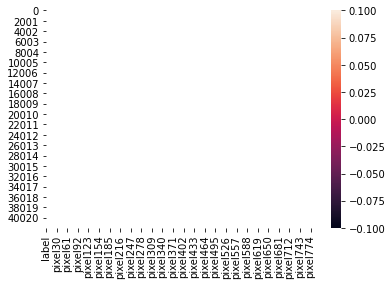

In [15]:
sns.heatmap(df.isnull());
plt.show();

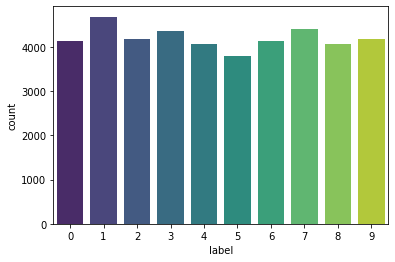

In [16]:
sns.countplot(df['label'], palette="viridis")

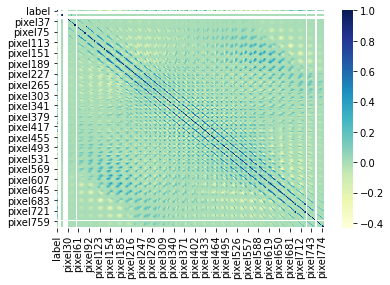

In [17]:
plt.figure
sns.heatmap(data=df.corr(), annot=False, cmap="YlGnBu")

### **Let's check value count of each digit in the dataset**

In [18]:
df['label'].value_counts().sort_values(ascending = False)  #to get count of every digit

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

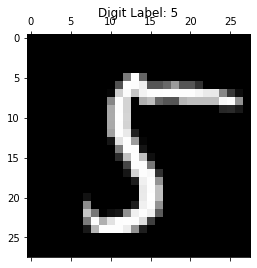

In [19]:
plt.matshow(pixel_mat(x), cmap=plt.cm.gray)
plt.title("Digit Label: %d" % df['label'].iloc[x])
plt.show()

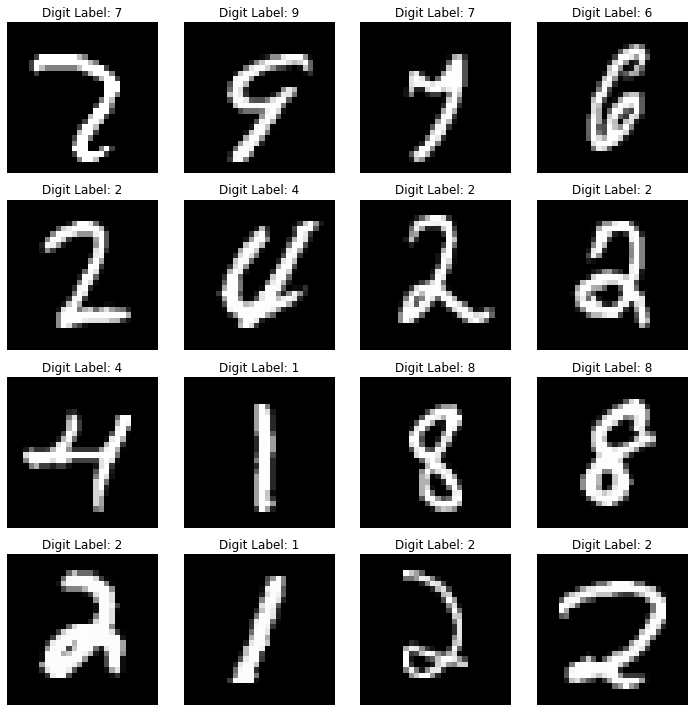

In [20]:
# generate a list of 16 random rows which are our digits
rand_idx = np.random.choice(df.index, size=16, replace=False)
# generate a 4x4 grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

# define counter over rand_idx list elements
i = 0
# axs is a 4x4 array so we flatten it into a vector in order to loop over it
for ax in axs.reshape(-1):
    # Title is digit label, which can be found by referencing the label column of the row specified by rand_idx[i]
    ax.set_title("Digit Label: %d" % df['label'].iloc[rand_idx[i]])
    # pixel_mat(rand_idx[i]) is the pixel matrix. 
    # The imshow flags are the ones that are used in the matshow wrapper
    ax.imshow(pixel_mat(rand_idx[i]), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
# tight_layout gives more spacing between subplots    
plt.tight_layout()   
# Tell matplotlib to draw all of the previously generated objects
plt.show()

In [21]:
df == 0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
41996,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
41997,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tru

In [22]:
(df == 0).all()

label       False
pixel0       True
pixel1       True
pixel2       True
pixel3       True
            ...  
pixel779    False
pixel780     True
pixel781     True
pixel782     True
pixel783     True
Length: 785, dtype: bool

In [23]:
df.columns[(df == 0).all()].tolist()

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel82',
 'pixel83',
 'pixel84',
 'pixel85',
 'pixel111',
 'pixel112',
 'pixel139',
 'pixel140',
 'pixel141',
 'pixel168',
 'pixel196',
 'pixel392',
 'pixel420',
 'pixel421',
 'pixel448',
 'pixel476',
 'pixel532',
 'pixel560',
 'pixel644',
 'pixel645',
 'pixel671',
 'pixel672',
 'pixel673',
 'pixel699',
 'pixel700',
 'pixel701',
 'pixel727',
 'pixel728',
 'pixel729',
 'pixel730',
 'pixel731',
 'pixel754',
 'pixel755',
 'pixel756',
 'pixel757',
 'pixel758',
 'pixel759',
 'pixel760',
 'pixel780',
 'pixel781',
 'pixel782',
 'pixel783']

In [24]:
zero_cols = list(set(df.columns[(df == 0).all()].tolist()))
len(zero_cols)

76

In [25]:
label_df = df['label']
label_df

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [26]:
counts_df = label_df.value_counts().sort_index()
counts_df

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [27]:
freq_df = label_df.value_counts(normalize=True).sort_index()
freq_df

0    0.09838
1    0.11152
2    0.09945
3    0.10360
4    0.09695
5    0.09036
6    0.09850
7    0.10479
8    0.09674
9    0.09971
Name: label, dtype: float64

In [28]:
print("Mean of digit frequency is: %f, standard deviation is: %f" % (freq_df.mean(), freq_df.std()))

Mean of digit frequency is: 0.100000, standard deviation is: 0.005645


In [29]:
stack_df = df.drop('label', axis=1).stack()
stack_df

0      pixel0      0
       pixel1      0
       pixel2      0
       pixel3      0
       pixel4      0
                  ..
41999  pixel779    0
       pixel780    0
       pixel781    0
       pixel782    0
       pixel783    0
Length: 32928000, dtype: int64

In [30]:
stack_df.value_counts(normalize=True).sort_index()

0      0.80847
1      0.00049
2      0.00072
3      0.00077
4      0.00081
        ...   
251    0.00238
252    0.01415
253    0.03239
254    0.01701
255    0.00678
Length: 256, dtype: float64

In [31]:
intensity_cuts = pd.cut(stack_df.values, 4)
intensity_cuts

[(-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], ..., (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75]]
Length: 32928000
Categories (4, interval[float64]): [(-0.255, 63.75] < (63.75, 127.5] < (127.5, 191.25] <
                                    (191.25, 255.0]]

In [32]:
pd.value_counts(intensity_cuts, normalize=True).sort_index()

(-0.255, 63.75]    0.84323
(63.75, 127.5]     0.02414
(127.5, 191.25]    0.02635
(191.25, 255.0]    0.10627
dtype: float64

### **Design Matrices**

In [33]:
df['label'].head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [34]:
df['label'].head(10).values

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [35]:
y_train = df['label'].values

In [36]:
df.drop(['label'], axis=1).head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
x_train = df.drop(['label'], axis=1).values

### **Creating Validation Sets**

In [38]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [39]:
validation_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=46)

In [40]:
validation_split.split(x_train, y_train)

<generator object BaseShuffleSplit.split at 0x7f1a1b8fc950>

In [41]:
list(validation_split.split(x_train, y_train))

[(array([40237, 36373, 22534, ...,  7590, 40484, 26735]),
  array([26645,  5031, 36381, ..., 23624, 10471, 28943]))]

In [42]:
training_idx, validation_idx = list(validation_split.split(x_train, y_train))[0]

In [43]:
x_training = x_train[training_idx]
y_training = y_train[training_idx]

x_validation = x_train[validation_idx]
y_validation = y_train[validation_idx]

In [44]:
training_df = df.iloc[training_idx]
validation_df = df.iloc[validation_idx]

### **Tuning Split**

In [45]:
tuning_split = StratifiedShuffleSplit(n_splits=1, train_size=0.15, random_state=96)

In [46]:
tune_idx = list(tuning_split.split(x_training, y_training))[0][0]

In [47]:
x_tune = x_training[tune_idx]
y_tune = y_training[tune_idx]

### **Metrics**

In [48]:
from sklearn.metrics import accuracy_score

### **Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state = 32)

### **Hyperparameter Search and Optimization**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
# run randomized search
def random_search(clf, param_dist, n_iter_search, predictors, labels):
    rs = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'accuracy',
                                   n_jobs=-1, n_iter=n_iter_search, cv=kfold) 
    start = time()
    rs.fit(predictors, labels)
    print("RandomizedSearchCV took %.2f seconds for %d candidates" 
          " parameter settings." % ((time() - start), n_iter_search))
    report(rs.cv_results_)

In [53]:
from time import time

In [54]:
kfold = StratifiedKFold(n_splits=10, random_state=7)

In [55]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [56]:
import scipy
rf_param =  {'n_estimators': scipy.stats.randint(50,400), 'max_depth': scipy.stats.randint(2,20), 
             'max_features': scipy.stats.randint(15,40)}

In [57]:
random_search(rf_clf, rf_param, 20, x_tune, y_tune)

RandomizedSearchCV took 642.15 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.939 (std: 0.009)
Parameters: {'max_depth': 15, 'max_features': 36, 'n_estimators': 277}

Model with rank: 2
Mean validation score: 0.939 (std: 0.011)
Parameters: {'max_depth': 18, 'max_features': 29, 'n_estimators': 382}

Model with rank: 3
Mean validation score: 0.939 (std: 0.010)
Parameters: {'max_depth': 12, 'max_features': 36, 'n_estimators': 185}



In [58]:
from sklearn.model_selection import cross_val_score

# run single parameter search 
def single_search(clf, params, predictors, labels):
    start = time()
    clf_results_df = pd.DataFrame(dtype = 'float64')
    count = 0
    for k, v in params.items():
        for val in v:
            clf.set_params(**{k: val})
            clf_results_df.loc[count, k] = val
            results = cross_val_score(clf, predictors, labels, cv=kfold, scoring = 'accuracy')
            (clf_results_df.loc[count, 'accuracy'], clf_results_df.loc[count, 'std dev']) = \
                (results.mean(), results.std())
            count += 1
    print("single_search took %.2f seconds for %d candidates." % ((time() - start), count))            
    return clf_results_df

### **Learning Curve**

In [61]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pylab' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pylab.py'>

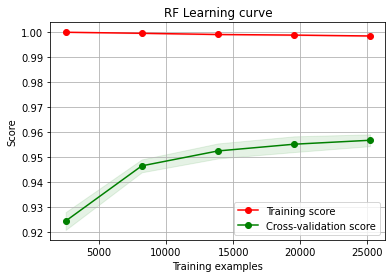

In [62]:
plot_learning_curve(rf_clf, "RF Learning curve", x_training, y_training, n_jobs=-1)

### **Validation**

In [63]:
rf_clf.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=296,
                       n_jobs=-1, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [64]:
y_rf_pred = rf_clf.predict(x_validation)

In [65]:
accuracy_score(y_validation, y_rf_pred)

0.9622857142857143

### **Drop Padding**

In [66]:
x_training_dropzeros = training_df.drop(zero_cols, axis=1).values

x_validation_dropzeros = validation_df.drop(zero_cols, axis=1).values

In [67]:
tune_df = training_df.iloc[tune_idx]

x_tune_dropzeros = tune_df.drop(zero_cols, axis=1).values

In [68]:
random_search(rf_clf, rf_param, 20, x_tune_dropzeros, y_tune)

RandomizedSearchCV took 660.47 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.973 (std: 0.008)
Parameters: {'max_depth': 19, 'max_features': 37, 'n_estimators': 322}

Model with rank: 2
Mean validation score: 0.972 (std: 0.005)
Parameters: {'max_depth': 12, 'max_features': 38, 'n_estimators': 342}

Model with rank: 3
Mean validation score: 0.971 (std: 0.008)
Parameters: {'max_depth': 11, 'max_features': 37, 'n_estimators': 356}



In [69]:
rf_clf_dropzeros = RandomForestClassifier(n_estimators = 347, max_depth = 16, max_features = 25, random_state = 32)

In [70]:
rf_clf_dropzeros.fit(x_training_dropzeros, y_training)
y_rf_dropzeros_pred = rf_clf_dropzeros.predict(x_validation_dropzeros)
accuracy_score(y_validation, y_rf_dropzeros_pred)

0.9844761904761905

### **Flatten Greyscale**

In [71]:
x_training_flat = x_training_dropzeros.astype(bool)*1

x_validation_flat = x_validation_dropzeros.astype(bool)*1

x_tune_flat = x_tune_dropzeros.astype(bool)*1

In [72]:
random_search(rf_clf, rf_param, 20, x_tune_flat, y_tune)

RandomizedSearchCV took 357.24 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.943 (std: 0.012)
Parameters: {'max_depth': 14, 'max_features': 39, 'n_estimators': 353}

Model with rank: 2
Mean validation score: 0.942 (std: 0.011)
Parameters: {'max_depth': 17, 'max_features': 33, 'n_estimators': 197}

Model with rank: 3
Mean validation score: 0.941 (std: 0.011)
Parameters: {'max_depth': 16, 'max_features': 26, 'n_estimators': 262}



In [73]:
rf_clf_flat = RandomForestClassifier(n_estimators = 332, max_depth = 14, max_features = 35, random_state = 32)

In [74]:
rf_clf_flat.fit(x_training_flat, y_training)
y_rf_flat_pred = rf_clf_flat.predict(x_validation_flat)
accuracy_score(y_validation, y_rf_flat_pred)

0.9655238095238096

### **Examining the Model's Mistakes**

In [75]:
error_idx = np.where(y_validation != y_rf_dropzeros_pred)[0]
error_idx

array([   29,    44,   146,   221,   224,   281,   321,   332,   346,
         438,   479,   537,   557,   835,   967,   988,  1015,  1040,
        1048,  1083,  1094,  1111,  1151,  1220,  1291,  1403,  1455,
        1462,  1533,  1535,  1559,  1567,  1608,  1651,  1653,  1749,
        1884,  1921,  2015,  2052,  2069,  2082,  2229,  2292,  2343,
        2399,  2403,  2415,  2465,  2511,  2564,  2600,  2715,  2749,
        2750,  2774,  2783,  2826,  3047,  3069,  3081,  3305,  3341,
        3413,  3469,  3615,  4060,  4084,  4139,  4244,  4283,  4300,
        4337,  4364,  4404,  4444,  4503,  4574,  4722,  4757,  4840,
        4849,  4920,  4960,  5099,  5153,  5165,  5390,  5460,  5493,
        5600,  5608,  5609,  5628,  5698,  5752,  5787,  5889,  5964,
        5965,  5972,  6107,  6248,  6418,  6476,  6491,  6575,  6685,
        6711,  6720,  6728,  6813,  6872,  7079,  7127,  7140,  7618,
        7673,  7937,  8020,  8039,  8199,  8221,  8397,  8417,  8429,
        8515,  8576,

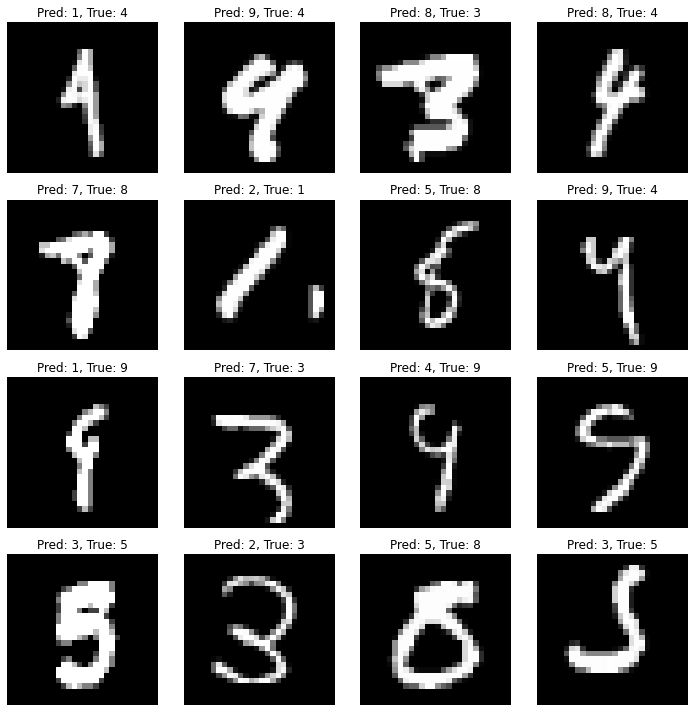

In [76]:
rand_idx = np.random.choice(error_idx, size=16, replace=False)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Pred: %d, True: %d" % (y_rf_dropzeros_pred[rand_idx[i]], y_validation[rand_idx[i]]))
    ax.imshow(x_validation[rand_idx[i]].reshape(28,28), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
plt.tight_layout()    
plt.show()

## **Thank You** 